# Medical Insurance Premium Prediction Using Machine Learning

---

## Importing the libraries and dataset

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Dataset

In [89]:
dataset = pd.read_csv('insurance.csv')

## Data Exploration

In [90]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
dataset.shape

(1338, 7)

In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [94]:
len(dataset.select_dtypes(include='object').columns)

3

In [95]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [96]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

---

## Statistical Summary

In [97]:
# Statistical summary 
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Group by the dataset
- by 'sex', 'smoker', 'region'

In [98]:
dataset.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [99]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [100]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


---

## Part 1: Data Preprocessing

### Dealing with Missing Values

In [101]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
dataset.isnull().values.any()

np.False_

In [103]:
dataset.isnull().values.sum()

np.int64(0)

---

## Encoding the Categorical data

In [104]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [105]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [106]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [107]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [108]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
dataset['sex'] = dataset['sex'].map({'male': 1, 'female': 0})
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})
dataset = pd.get_dummies(dataset, columns=['region'], drop_first=True, dtype=int)

In [110]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [111]:
dataset = dataset.rename(columns={'sex':'sex_male','smoker':'smoker_yes'})

In [112]:
dataset.head()

,age,sex_male,bmi,children,smoker_yes,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [113]:
dataset.shape

(1338, 9)

---

### Correlation Matrix

In [114]:
dataset_2 = dataset.drop(columns='charges')

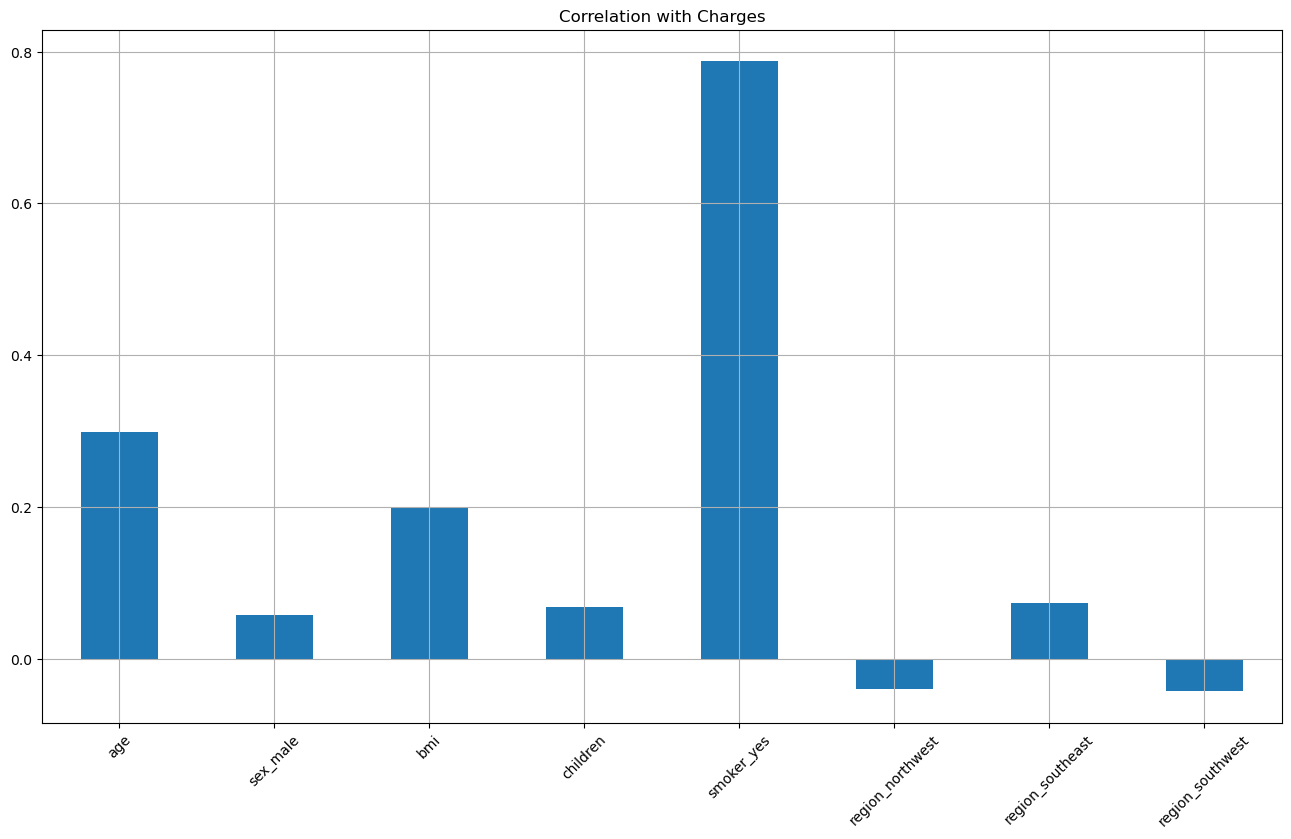

In [116]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with Charges', rot=45, grid=True
)
plt.show()

In [117]:
corr = dataset.corr()

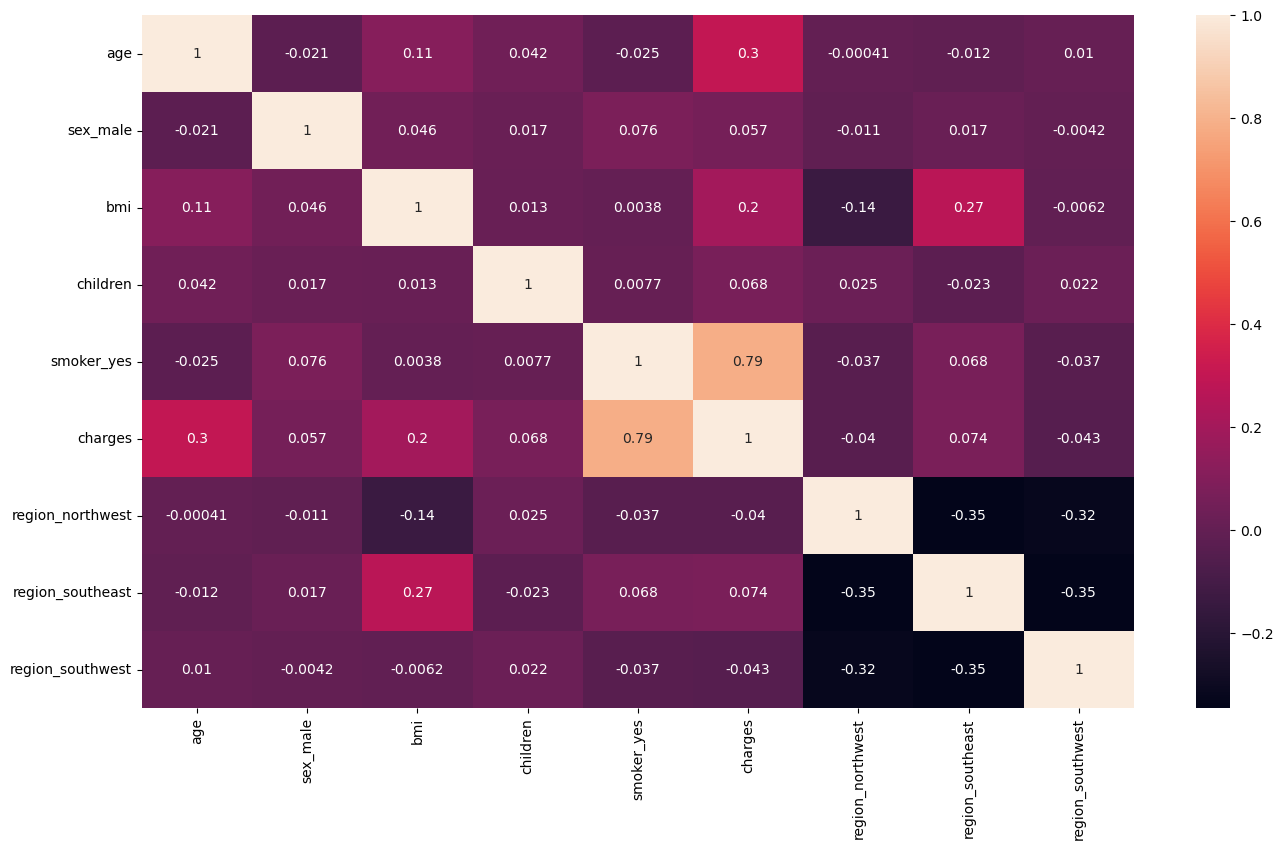

In [119]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
plt.show()

### Splitting the dataset

In [120]:
dataset.head()

,age,sex_male,bmi,children,smoker_yes,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [121]:
# Matrix of features / independent variables
x = dataset.drop(columns='charges')

In [122]:
# target / dependent variable
y = dataset['charges']

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [124]:
x_train.shape

(1070, 8)

In [125]:
y_train.shape

(1070,)

In [126]:
x_test.shape

(268, 8)

In [127]:
y_test.shape

(268,)

---

## Feature Scaling 

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [129]:
x_train

array([[-0.14853305,  1.01506676,  0.54530479, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  1.01506676,  0.59867181, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553, -0.98515688,  0.96092064, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033,  1.01506676, -0.91339361, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  1.01506676,  0.77656186, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -0.98515688, -1.97749955, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [130]:
x_test

array([[ 0.91668389,  1.01506676, -0.08539629, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.98515688, -0.21962242, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.01506676,  1.59081313, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.01506676,  1.54472343, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429, -0.98515688,  1.34581001, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711,  1.01506676, -0.95948331, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

---

## Part 2: Building the model

### 1) Multiple Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [132]:
y_pred = regressor_lr.predict(x_test)

In [133]:
from sklearn.metrics import r2_score

In [134]:
r2_score(y_test, y_pred)

0.7999876970680433

### 2) Random Forest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [136]:
y_pred = regressor_rf.predict(x_test)

In [137]:
r2_score(y_test, y_pred)

0.8851487285450864

### 3) XGBoost Regression

In [138]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [139]:
y_pred = regressor_xgb.predict(x_test)

In [140]:
r2_score(y_test, y_pred)

0.9009946160175004

---

## Part 3: Predict charges for a new customer

### Example:1

Name: Frank, age: 40, sex: 1, bmi: 45.50, children: 4, smoker: 1, region: northeast

In [141]:
dataset.head()

,age,sex_male,bmi,children,smoker_yes,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [142]:
frank_obs = [[40, 1, 45.50, 4, 1, 0, 0, 0]]

In [143]:
regressor_xgb.predict(sc.transform(frank_obs))

C:\Users\kandu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44276.098], dtype=float32)

### Example 2

Name: Nikhila, age: 19, bmi: 27.9, children: 0, sex: female, smoker: no, region: northwest

In [144]:
dataset.head()

,age,sex_male,bmi,children,smoker_yes,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [151]:
obs = [[19, 0, 27.9, 0, 0, 1, 0, 0]]

In [152]:
obs

[[19, 0, 27.9, 0, 0, 1, 0, 0]]

In [153]:
regressor_xgb.predict(sc.transform(obs))

C:\Users\kandu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2439.8381], dtype=float32)

---